# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint
import time
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 617


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [4]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric&q="

# {}&appid={weather_api_key}

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}{city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    city_response = requests.get(city_url)
    city_response_json = city_response.json()
    print(city_response.status_code)
    try:
        # Parse the JSON and retrieve data
        city_weather = city_response_json["weather"][0]["description"]

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_response_json["coord"]["lat"]
        city_lng = city_response_json["coord"]["lon"]
        city_max_temp = city_response_json["main"]["temp_max"]
        city_humidity = city_response_json["main"]["humidity"]
        city_clouds = city_response_json["clouds"]["all"]
        city_wind = city_response_json["wind"]["speed"]
        city_country = city_response_json["sys"]["country"]
        city_date = city_response_json["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})
        #I had to put this in because I was getting some error without it. I still got the errors with only 1 second so 2 seconds it is!
        time.sleep(2)
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
200
Processing Record 2 of Set 1 | vila franca do campo
200
Processing Record 3 of Set 1 | toga village
404
City not found. Skipping...
Processing Record 4 of Set 1 | olonkinbyen
200
Processing Record 5 of Set 1 | torrington
200
Processing Record 6 of Set 1 | port-aux-francais
200
Processing Record 7 of Set 1 | touros
200
Processing Record 8 of Set 1 | enewetak
200
Processing Record 9 of Set 1 | quellon
200
Processing Record 10 of Set 1 | ushuaia
200
Processing Record 11 of Set 1 | bamboo flat
200
Processing Record 12 of Set 1 | urucara
200
Processing Record 13 of Set 1 | blackmans bay
200
Processing Record 14 of Set 1 | bethel
200
Processing Record 15 of Set 1 | shizukuishi
200
Processing Record 16 of Set 1 | carnarvon
200
Processing Record 17 of Set 1 | bilibino
200
Processing Record 18 of Set 1 | socorro
200
Processing Record 19 of Set 1 | jamestown
200
Processing Record 20 of Set 1 

In [5]:
# Convert the cities weather data into a Pandas DataFrame

city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          589
Lat           589
Lng           589
Max Temp      589
Humidity      589
Cloudiness    589
Wind Speed    589
Country       589
Date          589
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,0.01,80,23,5.73,GS,1682232583
1,vila franca do campo,37.7167,-25.4333,17.23,94,100,6.90,PT,1682232586
2,olonkinbyen,70.9221,-8.7187,-3.40,60,7,6.10,SJ,1682232589
3,torrington,41.8007,-73.1212,11.99,97,100,1.79,US,1682232534
4,port-aux-francais,-49.3500,70.2167,8.42,97,100,13.44,TF,1682232593


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.01,80,23,5.73,GS,1682232583
1,vila franca do campo,37.7167,-25.4333,17.23,94,100,6.90,PT,1682232586
2,olonkinbyen,70.9221,-8.7187,-3.40,60,7,6.10,SJ,1682232589
3,torrington,41.8007,-73.1212,11.99,97,100,1.79,US,1682232534
4,port-aux-francais,-49.3500,70.2167,8.42,97,100,13.44,TF,1682232593


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

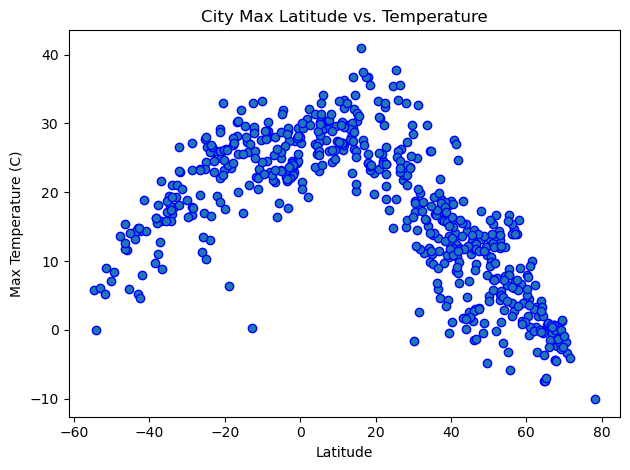

In [10]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="b")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Max Latitude vs. Temperature")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

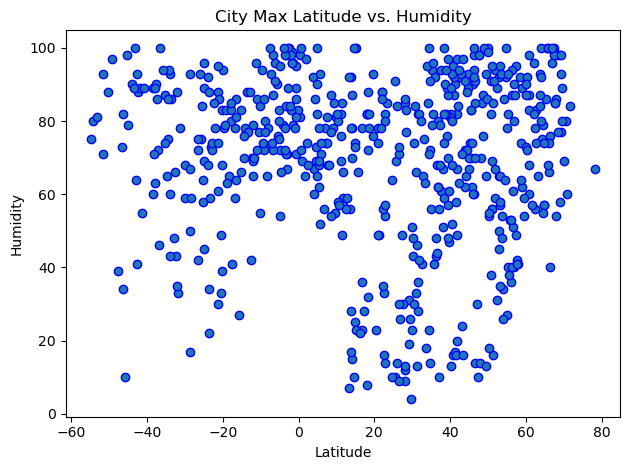

In [11]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="b")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("City Max Latitude vs. Humidity")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

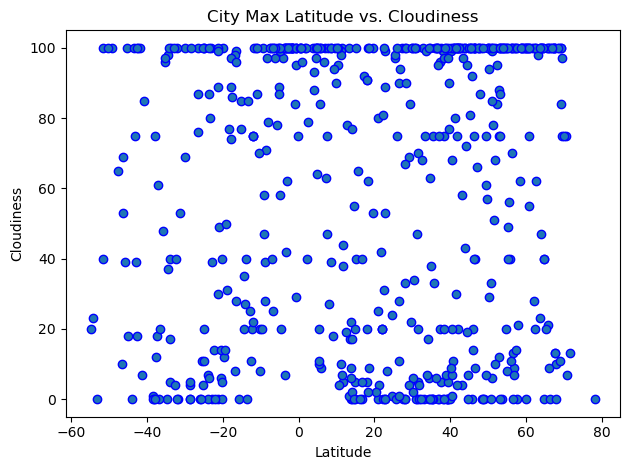

In [12]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="b")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("City Max Latitude vs. Cloudiness")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

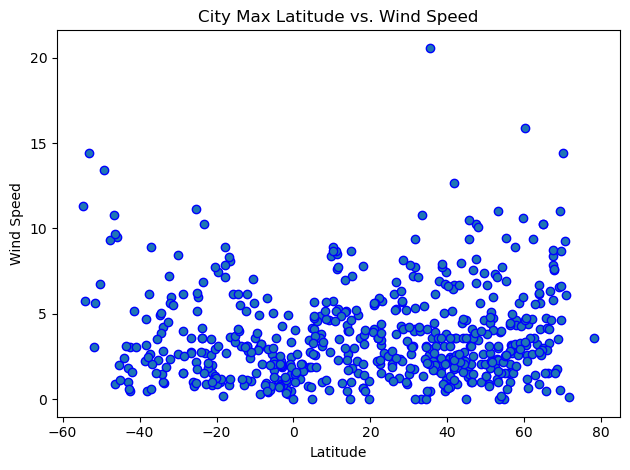

In [13]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="b")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title("City Max Latitude vs. Wind Speed")
plt.tight_layout()

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [ ]:
# Define a function to create Linear Regression plots
# YOUR CODE HERE

In [14]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,vila franca do campo,37.7167,-25.4333,17.23,94,100,6.90,PT,1682232586
2,olonkinbyen,70.9221,-8.7187,-3.40,60,7,6.10,SJ,1682232589
3,torrington,41.8007,-73.1212,11.99,97,100,1.79,US,1682232534
6,enewetak,11.3474,162.3373,26.15,85,100,7.65,MH,1682232598
9,bamboo flat,11.7000,92.7167,32.31,59,44,2.31,IN,1682232606


In [15]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,0.01,80,23,5.73,GS,1682232583
4,port-aux-francais,-49.3500,70.2167,8.42,97,100,13.44,TF,1682232593
5,touros,-5.1989,-35.4608,25.02,83,89,5.02,BR,1682232478
7,quellon,-43.1167,-73.6167,5.14,100,75,1.03,CL,1682232601
8,ushuaia,-54.8000,-68.3000,5.81,75,20,11.32,AR,1682232422


###  Temperature vs. Latitude Linear Regression Plot

The r value is: -0.8669954855001991


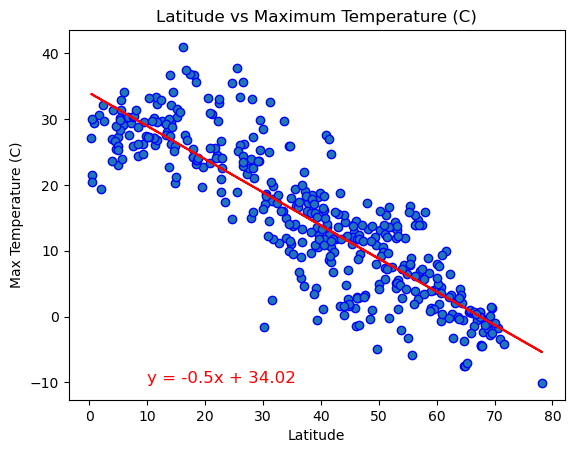

In [25]:
# Linear regression on Northern Hemisphere

slope, intercept, r, p, sterr = linregress(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"])
line = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"The r value is: {r}")
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Max Temp"],edgecolors="b")
plt.plot(northern_hemi_df["Lat"], slope*northern_hemi_df["Lat"] + intercept, color = "r")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Latitude vs Maximum Temperature (C)")
plt.annotate(line,(10,-10),fontsize = 12,color="r")
plt.show()


The r value is: 0.6989350980609672


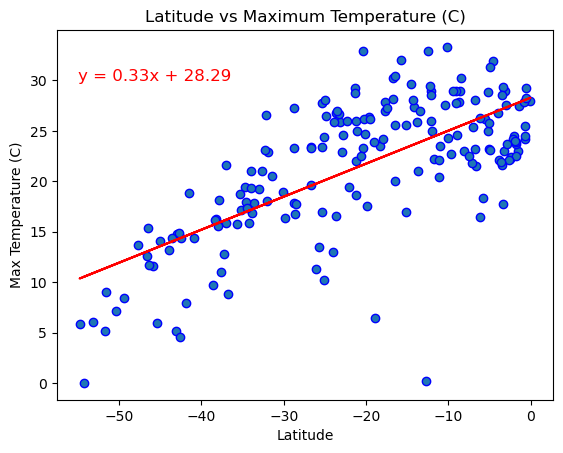

In [24]:
# Linear regression on Southern Hemisphere
slope, intercept, r, p, sterr = linregress(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"])
line = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"The r value is: {r}")
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Max Temp"],edgecolors="b")
plt.plot(southern_hemi_df["Lat"], slope*southern_hemi_df["Lat"] + intercept, color = "r")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("Latitude vs Maximum Temperature (C)")
plt.annotate(line,(-55,30),fontsize = 12,color="r")
plt.show()


**Discussion about the linear relationship:** For both the southern and northern hemispheres, the closer you are to the equator, the higher the maximum temperature it.

### Humidity vs. Latitude Linear Regression Plot

The r value is: 0.13966607167766681


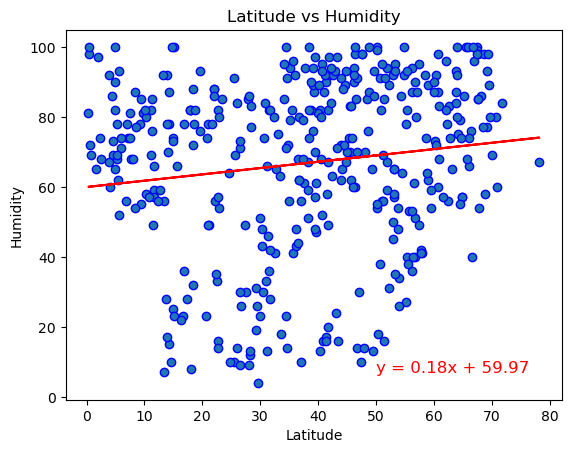

In [23]:
# Northern Hemisphere
slope, intercept, r, p, sterr = linregress(northern_hemi_df["Lat"],northern_hemi_df["Humidity"])
line = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"The r value is: {r}")
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Humidity"],edgecolors="b")
plt.plot(northern_hemi_df["Lat"], slope*northern_hemi_df["Lat"] + intercept, color = "r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.annotate(line,(50,7),fontsize = 12,color="r")
plt.show()


The r value is: 0.20298760773851102


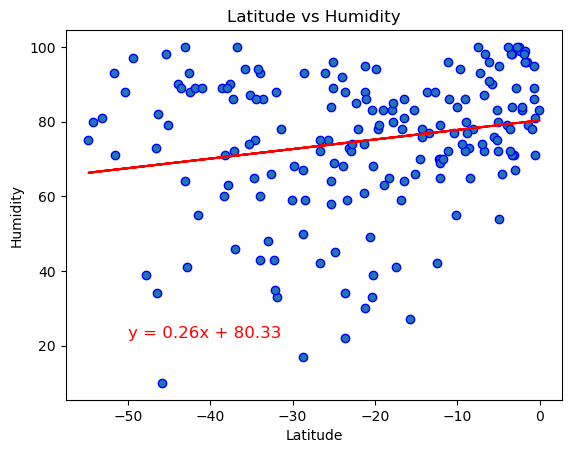

In [22]:
# Southern Hemisphere
slope, intercept, r, p, sterr = linregress(southern_hemi_df["Lat"],southern_hemi_df["Humidity"])
line = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"The r value is: {r}")
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Humidity"],edgecolors="b")
plt.plot(southern_hemi_df["Lat"], slope*southern_hemi_df["Lat"] + intercept, color = "r")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title("Latitude vs Humidity")
plt.annotate(line,(-50,22),fontsize = 12,color = "r")
plt.show()


**Discussion about the linear relationship:** There is seemingly no correlation between latitude and humidity.

### Cloudiness vs. Latitude Linear Regression Plot

The r value is: 0.09622224097700799


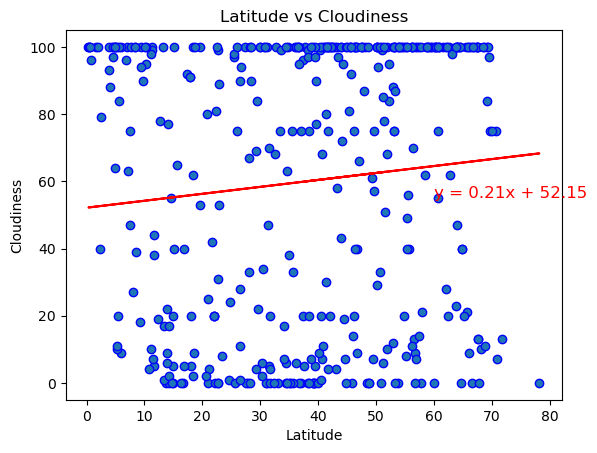

In [26]:
# Northern Hemisphere
slope, intercept, r, p, sterr = linregress(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"])
line = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"The r value is: {r}")
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Cloudiness"],edgecolors="b")
plt.plot(northern_hemi_df["Lat"], slope*northern_hemi_df["Lat"] + intercept, color = "r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.annotate(line,(60,55),fontsize = 12,color="r")
plt.show()

The r value is: 0.3131327941251404


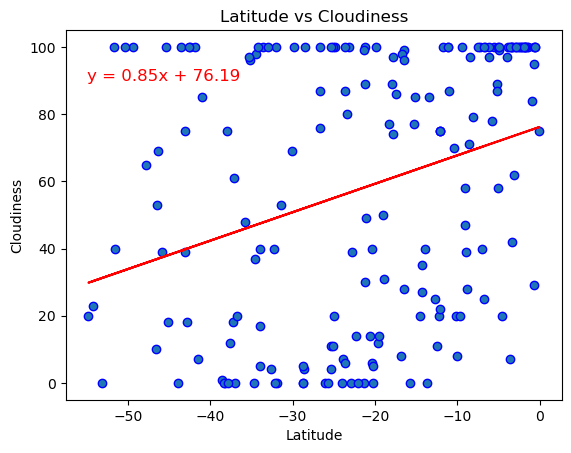

In [27]:
# Southern Hemisphere
slope, intercept, r, p, sterr = linregress(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"])
line = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"The r value is: {r}")
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Cloudiness"],edgecolors="b")
plt.plot(southern_hemi_df["Lat"], slope*southern_hemi_df["Lat"] + intercept, color = "r")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title("Latitude vs Cloudiness")
plt.annotate(line,(-55,90),fontsize = 12,color="r")
plt.show()

**Discussion about the linear relationship:** There is seemlingly no correlation between latitude and cloudiness.

### Wind Speed vs. Latitude Linear Regression Plot

The r value is: 0.11761727358614686


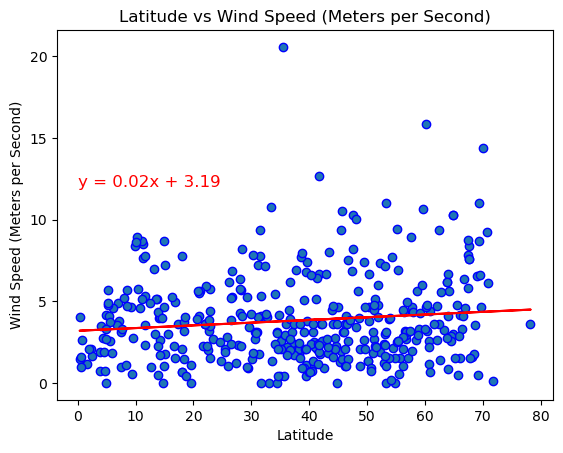

In [28]:
# Northern Hemisphere
slope, intercept, r, p, sterr = linregress(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"])
line = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"The r value is: {r}")
plt.scatter(northern_hemi_df["Lat"],northern_hemi_df["Wind Speed"],edgecolors="b")
plt.plot(northern_hemi_df["Lat"], slope*northern_hemi_df["Lat"] + intercept, color = "r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Meters per Second)")
plt.title("Latitude vs Wind Speed (Meters per Second)")
plt.annotate(line,(0,12),fontsize = 12,color="r")
plt.show()

The r value is: -0.37267312023293364


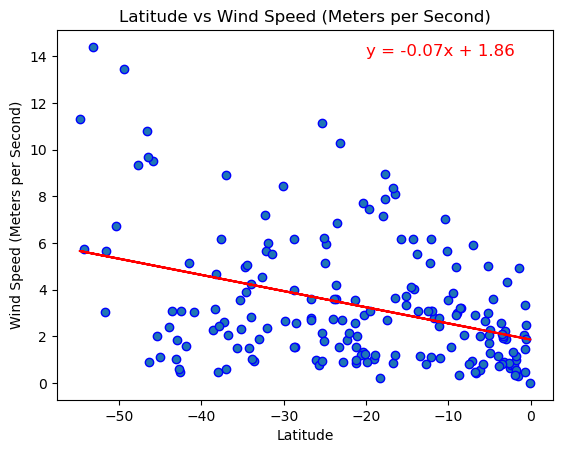

In [29]:
# Southern Hemisphere
slope, intercept, r, p, sterr = linregress(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"])
line = f"y = {round(slope,2)}x + {round(intercept,2)}"
print(f"The r value is: {r}")
plt.scatter(southern_hemi_df["Lat"],southern_hemi_df["Wind Speed"],edgecolors="b")
plt.plot(southern_hemi_df["Lat"], slope*southern_hemi_df["Lat"] + intercept, color = "r")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (Meters per Second)")
plt.title("Latitude vs Wind Speed (Meters per Second)")
plt.annotate(line,(-20,14),fontsize = 12,color="r")
plt.show()

**Discussion about the linear relationship:** It seems that there is a higher amount of wind as you get far south, however this is not very statistically significant due to the extremely low number sample size. (or at least in this random sample only four have a latitude less that -50)